# Analizing Magnatagatune

In [1]:
import collections
import csv
import operator
import os

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [21]:
PATH_DATASET = 'datasets/maganatagatune'
ANNOTATIONS_CSV = os.path.join(PATH_DATASET, 'annotations_final.csv')

genres = {}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    genres = {genre: 0 for genre in reader.fieldnames[1:-1]}  # 0:clip_id, -1:mp3_path
    for row in reader:
        for tag in genres:
            genres[tag] += int(row[tag])

188


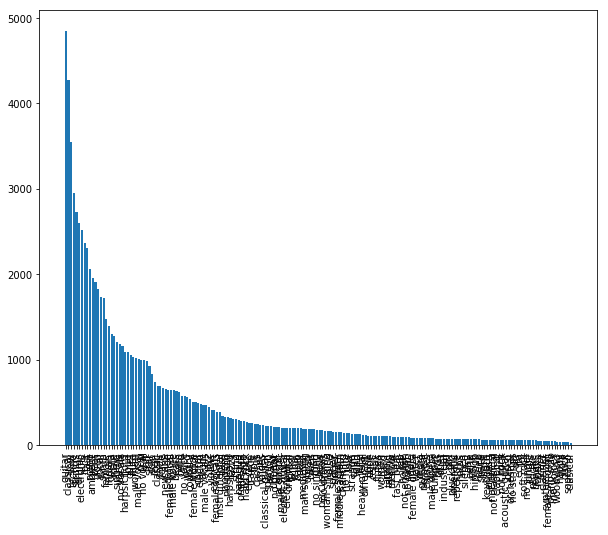

In [25]:
def plot_genre_dict(genres, top=None):
    print(len(genres))
    if top == None:
        top = len(genres.items())
    sorted_genres = list(reversed(sorted(genres.items(), key=operator.itemgetter(1))))
    top_genres = sorted_genres[:top]
    #print([t[0] for t in top_genres])
    plt.bar(range(len(top_genres)), [d[1] for d in top_genres], align='center')
    plt.xticks(range(len(top_genres)), [d[0] for d in top_genres], rotation='vertical')
    plt.show()
    
plot_genre_dict(genres)

**PROBLEM**: not all tags are genres. Let's see them.

In [26]:
for tag in sorted(genres, key=operator.itemgetter(0))[:50]:
    print(tag)

ambient
airy
acoustic
acoustic guitar
arabic
bongos
beats
banjo
birds
bass
bells
blues
beat
baroque
clasical
chorus
clarinet
chimes
classical
classic
chanting
choral
classical guitar
country
chant
celtic
cello
calm
clapping
choir
duet
drum
drums
dark
drone
disco
deep
dance
different
eerie
electric
electronic
electric guitar
electro
electronica
echo
eastern
english
female singing
female opera


In [27]:
genre_tags = [
    'ambient',
    'arabic',
    'blues',
    'baroque',
    ('classical', 'clasical'),
    ('choir', 'choral'),
    'country',
    'celtic',
    'disco',
    'dance',
    ('funk', 'funky'),
    ('electronica', 'electro'),
    #('female voice', 'female vocal', 'female vocals', 'female singer', 'female singing', 'woman singing'),
    #('male voice', 'male vocal', 'male vocals', 'male singer', 'man singing'),
    'folk',
    'happy',
    'eastern',
    'middle eastern',
    'medieval',
    ('heavy metal', 'heavy', 'metal'),
    'hip hop',
    'industrial',
    ('indian', 'india'),
    'irish',
    ('jazz', 'jazzy'),
    'jungle',
    'new age',
    ('instrumental', 'no voice', 'no voices', 'no singing', 'no vocal', 'no vocals'),
    ('opera', 'male opera', 'female opera', 'operatic'),
    'oriental',
    'pop',
    'punk',
    'reggae',
    'rock',
    'hard rock',
    'soft rock',
    'rap',
    'trance',
    'techno',
    'world',
]

genre_dict = {}
accepted_genres = set()
for genre in genre_tags:
    if isinstance(genre, tuple):
        for genre_i in genre:
            genre_dict[genre_i] = genre[0]
        accepted_genres.add(genre[0])
    else:
        genre_dict[genre] = genre
        accepted_genres.add(genre)

print(len(accepted_genres))
assert len(accepted_genres) == len(genre_tags)

38


In [28]:
genres = {g: 0 for g in accepted_genres}
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    for row in reader:
        for tag, accepted_genre in genre_dict.items():
            genres[accepted_genre] += int(row[tag])

38


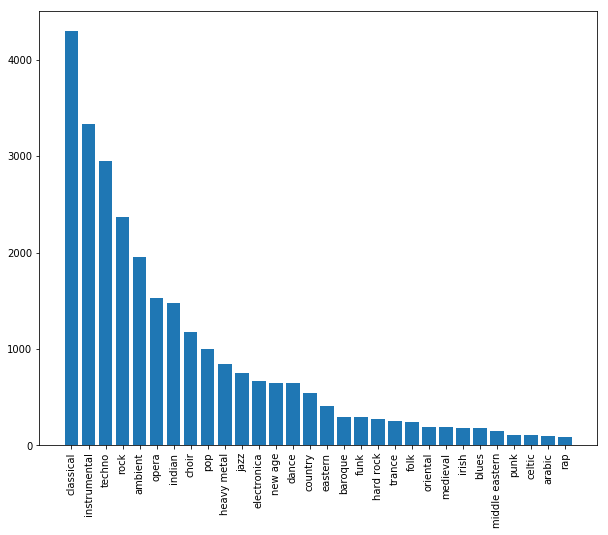

In [29]:
plot_genre_dict(genres, top=30)

After grouping the ones I'm interested in, it turns out it's the same ones as before.
The dataset is sadly not balanced, but we'll work with it since it seems to be quite a standard.

In [30]:
with open(ANNOTATIONS_CSV, 'r') as tsvfile:
    reader = csv.DictReader(tsvfile, dialect='excel-tab')
    genres = {genre: 0 for genre in reader.fieldnames[1:-1]}  # 0:clip_id, -1:mp3_path
    for row in reader:
        print([g for g in genres if row[g] == '1'])

['classical', 'strings', 'opera', 'violin']
['classical', 'violins', 'strings', 'classic', 'opera', 'violin', 'baroque']
['classical', 'classic', 'opera']
['quiet', 'opera']
['classical', 'violins', 'strings', 'classic', 'violin']
['techno']
[]
['electronic', 'fast', 'rock']
['fast']
[]
['classical', 'violin']
['guitar']
['harpsichord', 'classical', 'harpsicord', 'loud', 'fast']
[]
['foreign', 'female', 'voice', 'spanish', 'women']
['foreign', 'female', 'pop', 'spanish', 'female vocals']
['slow']
['opera', 'male']
['opera']
['vocals', 'female', 'opera', 'vocal', 'singing', 'choir']
['chorus', 'choral', 'choir']
['choir']
['duet', 'classical', 'quiet', 'female voice', 'voice', 'choral', 'opera', 'woman', 'singing', 'female vocals']
['classical', 'opera', 'vocal']
['classical', 'opera']
[]
[]
['chorus', 'choral', 'opera', 'choir']
[]
['classical', 'female', 'choral', 'opera', 'slow', 'male', 'choir']
['duet', 'female', 'quiet', 'opera', 'slow', 'woman']
['chorus', 'classical', 'female', 

['no voice', 'new age', 'electronic', 'no vocal', 'no vocals', 'techno']
['techno', 'beat']
['plucking', 'sitar', 'classical', 'guitar', 'not rock', 'harp', 'slow', 'different']
['guitar', 'string', 'slow']
['harp', 'slow']
['harp']
['classical', 'harp', 'slow', 'soft']
['quiet', 'slow']
['harp', 'slow']
['guitar']
['guitar', 'quiet', 'no vocal', 'harp', 'piano', 'slow']
['classical', 'guitar', 'solo', 'strings', 'no vocals', 'harp', 'piano']
['plucking', 'classical', 'guitar', 'solo', 'strings', 'string', 'no vocal', 'no vocals', 'harp', 'slow', 'oriental', 'soft']
[]
['classical', 'guitar', 'strings', 'harp', 'spanish']
['harp', 'piano', 'slow']
['plucking', 'sitar', 'guitar', 'solo', 'strings', 'harp', 'piano', 'eastern', 'slow', 'oriental', 'soft']
['no voice', 'piano', 'slow']
['classical', 'guitar', 'solo', 'strings', 'string', 'harp', 'piano', 'slow', 'oriental']
['sitar', 'ambient', 'strings', 'no vocals', 'harp', 'piano', 'slow', 'indian', 'soft']
[]
['foreign', 'voice', 'weir

['sitar', 'guitar', 'middle eastern', 'strings', 'eastern', 'slow', 'indian']
['sitar', 'quiet', 'strings', 'piano', 'slow', 'indian', 'soft']
['sitar', 'percussion', 'indian']
['sitar', 'slow', 'indian']
[]
['sitar', 'guitar', 'slow', 'indian', 'oriental']
['sitar', 'banjo', 'drum', 'strings', 'no vocals', 'slow', 'indian', 'india']
['sitar', 'quiet', 'eastern', 'indian']
['sitar', 'indian']
['sitar', 'eastern', 'indian']
['sitar', 'arabic', 'indian']
['sitar', 'indian', 'india']
['sitar', 'guitar', 'indian']
['sitar', 'drums', 'eastern', 'indian', 'oriental']
['sitar', 'no vocals', 'indian']
['sitar', 'indian']
['sitar', 'indian']
['sitar', 'weird', 'fast', 'eastern', 'indian']
['sitar', 'guitar', 'eastern', 'indian', 'india', 'not opera']
['sitar', 'indian']
[]
['indian']
['sitar', 'indian', 'no singer']
['sitar', 'harp', 'indian', 'india', 'oriental']
['sitar', 'drums', 'fast', 'indian']
['sitar', 'eastern', 'indian']
['sitar']
['sitar', 'guitar', 'no singing', 'indian', 'oriental'

['no voice', 'vocals', 'guitar', 'electronic', 'no vocal', 'no vocals', 'slow', 'beat']
['beat']
['chorus', 'vocals', 'choral', 'opera', 'chant', 'singing', 'choir']
['choral', 'opera', 'chant', 'male', 'voices', 'choir']
['chorus', 'choral', 'male vocals', 'choir']
[]
[]
['classical', 'opera', 'vocal', 'women']
['classical', 'opera', 'violin', 'soft']
['opera']
['classical', 'opera', 'singing']
['synth', 'percussion', 'repetitive', 'drums', 'electronic', 'techno', 'house', 'beat', 'upbeat']
['drums', 'techno', 'beat']
['beats', 'electric', 'drums', 'trance', 'dance', 'techno', 'house', 'beat']
['techno']
['drums', 'techno', 'beat']
['drums', 'electronic', 'fast', 'techno']
[]
[]
['beats', 'synth', 'drum', 'bass', 'weird', 'no vocals', 'deep', 'techno', 'beat']
['chant']
['choral', 'vocal', 'choir']
['male vocal', 'opera', 'male vocals']
[]
['slow', 'vocal', 'monks']
['jazz', 'guitar', 'drums', 'blues']
['jazz', 'male singer', 'blues', 'rock']
['vocals', 'rock']
['male vocal', 'guitar'

['classical', 'strings', 'violin', 'flute']
['classical', 'violins', 'classic', 'string', 'violin', 'flute']
[]
['male vocal', 'rock']
['talking', 'vocal']
['ambient', 'synth', 'no singing', 'electronic', 'electro', 'modern']
[]
['synth', 'drums', 'techno', 'beat']
['new age', 'no vocal', 'instrumental']
[]
[]
['ambient', 'synth', 'electronic', 'techno']
['ambient', 'slow']
['male vocal', 'voice', 'male voice', 'male', 'vocal']
['male vocal', 'vocal']
['noise']
[]
[]
['silence', 'quiet', 'bass', 'drums', 'low']
['quiet', 'bass', 'dark']
['quiet', 'ambient', 'slow', 'soft']
[]
[]
['new age', 'slow']
[]
[]
['no strings', 'wind', 'ambient', 'synth', 'electronic', 'weird', 'slow']
['ambient']
[]
['no voice', 'no voices', 'quiet', 'ambient', 'synth', 'slow', 'soft']
['ambient']
['no guitar']
[]
['quiet', 'no singing', 'slow']
['eerie', 'spacey', 'quiet', 'wind', 'ambient', 'new age', 'synth', 'airy', 'bass', 'electronic', 'no vocals', 'low', 'synthesizer', 'slow', 'scary', 'soft']
['quiet',

['soft']
['vocals', 'female', 'ambient', 'female vocal', 'woman', 'not opera']
['female', 'vocal', 'singing', 'voices', 'women']
['drum', 'keyboard', 'electronic', 'organ', 'no vocals', 'techno']
['beats', 'synth', 'drum', 'electronic', 'dance', 'techno', 'beat']
[]
['electronic', 'techno']
['voice', 'drums', 'electronic', 'talking', 'electro', 'techno']
['electronic']
[]
['electric', 'fast', 'techno']
['synth', 'techno']
['guitar']
['guitar', 'slow']
['classical', 'guitar', 'new age', 'no vocal', 'soft']
['guitar']
['guitar', 'strings']
['new age', 'synth', 'electronic', 'techno', 'beat']
['female', 'ambient', 'new age', 'girl', 'electronic', 'vocal', 'singing']
['woman']
[]
['vocals', 'female voice', 'loud', 'pop', 'female vocal', 'woman', 'singing', 'female vocals']
[]
['female', 'female voice', 'loud', 'electronic', 'fast', 'pop', 'rock']
['female', 'female vocal', 'rock']
['guitar', 'drums', 'electronic', 'rock', 'beat']
[]
[]
[]
[]
[]
['rock']
['guitar', 'rock']
['guitar', 'rock'

['electronic', 'fast', 'dance', 'techno', 'beat']
['electronic', 'fast', 'dance', 'techno', 'beat']
['techno']
['no voice', 'electronic', 'techno']
['fast', 'electro', 'techno']
['male vocal', 'chant', 'slow']
['chorus', 'classical', 'opera', 'singing', 'choir']
[]
['choir']
['chorus', 'men', 'chanting', 'choral', 'vocal', 'choir']
['chorus', 'vocals', 'classical', 'choral', 'lol', 'male', 'choir']
['male vocal', 'vocals', 'loud', 'heavy metal', 'rock', 'metal']
['rock']
['male vocal', 'guitar', 'hard', 'rock']
['birds']
['birds']
[]
['guitar']
['female singing', 'female', 'guitar', 'folk', 'voice', 'country', 'pop', 'female vocal', 'vocal', 'woman', 'female vocals']
['female', 'female voice', 'female vocal', 'vocal', 'woman', 'woman singing', 'female vocals']
[]
['violin']
['classical', 'guitar', 'no vocal', 'no vocals', 'no flute']
['guitar', 'female voice', 'slow', 'vocal', 'rock']
['female', 'guitar', 'rock']
['guitar', 'female voice', 'bass', 'slow', 'vocal', 'woman singing', 'roc

['electric', 'synth', 'electronic', 'techno', 'beat']
[]
[]
['electronic', 'fast', 'electro', 'techno']
['voices', 'techno']
['voice', 'electronic', 'talking', 'weird', 'man', 'techno']
[]
['quiet', 'techno']
['synth', 'bass']
[]
[]
['classical', 'ambient', 'classic', 'electronic', 'slow', 'calm', 'soft']
['ambient', 'new age', 'strings', 'no vocal', 'no vocals', 'instrumental', 'chant', 'orchestra']
['no voice', 'ambient', 'synth', 'horn']
['synth', 'loud', 'drums', 'electronic', 'sax', 'techno']
['pop', 'female vocal']
[]
['pop', 'vocal', 'woman', 'female vocals']
['female', 'female voice', 'loud', 'pop', 'vocal', 'woman', 'woman singing', 'singing']
[]
['loud', 'fast']
['ambient', 'synth', 'trumpet', 'birds', 'strings', 'loud', 'drums', 'weird', 'electro', 'noise']
['beats', 'drum', 'drums', 'fast']
['beats', 'loud', 'drums', 'fast', 'fast beat', 'dance', 'techno', 'house', 'beat']
['drums', 'fast', 'fast beat', 'house', 'beat']
['drums', 'no vocal', 'fast', 'techno']
['drums', 'fas

['sitar', 'foreign', 'middle eastern', 'eastern', 'indian']
['arabic', 'eastern', 'oriental']
['techno']
['beats', 'drums', 'rock']
['loud', 'rock']
['heavy', 'rock', 'metal']
['no voice', 'guitar', 'loud', 'hard', 'rock', 'metal']
['heavy', 'guitar', 'loud', 'fast', 'hard', 'rock']
['heavy', 'guitar', 'drums', 'electronic', 'electro', 'rock']
[]
['hard rock', 'heavy', 'guitar', 'loud', 'drums', 'fast', 'rock', 'metal']
['heavy', 'guitar', 'loud', 'drums', 'no vocals', 'heavy metal', 'rock', 'metal']
['hard', 'rock']
['hard rock', 'heavy', 'guitar', 'loud', 'hard', 'rock', 'metal']
['loud', 'rock', 'metal']
['heavy', 'guitar', 'rock']
['beat']
[]
['drums', 'electronic', 'fast', 'electro', 'instrumental', 'rock', 'beat']
['indian']
['indian']
['middle eastern', 'drum', 'drums', 'arabic', 'eastern', 'indian']
['drums', 'arabic', 'eastern', 'indian', 'beat']
['indian']
['sitar', 'drums', 'eastern', 'indian']
[]
['loud', 'fast', 'techno', 'beat']
['drums', 'fast', 'techno']
['drums', 'fast

['female opera', 'female', 'solo', 'opera', 'vocal', 'woman']
['classical', 'female', 'opera', 'woman', 'singing']
['opera', 'vocal', 'woman']
['female', 'opera']
[]
['female', 'classic', 'opera']
['classical', 'opera']
['classical', 'opera']
['techno', 'beat']
['ambient', 'electronic', 'no vocals', 'industrial', 'slow']
['synth', 'electronic', 'weird', 'indian', 'no drums']
['synth', 'drums', 'weird', 'jungle', 'indian', 'techno']
['new age', 'synth', 'electronic', 'electro', 'slow']
['drums', 'slow', 'beat']
['ambient', 'new age', 'synth', 'electronic', 'electro', 'slow', 'flute', 'beat']
[]
['solo', 'piano', 'slow']
['classical', 'oboe', 'piano', 'slow', 'flute']
['duet', 'clarinet', 'woodwind', 'classical', 'guitar', 'quiet', 'classic', 'no guitar', 'violin', 'oboe', 'piano', 'orchestra', 'slow', 'different', 'flute']
['ambient', 'new age', 'no vocal', 'modern', 'piano', 'slow', 'flute']
[]
[]
['new age', 'synth', 'calm']
['no piano', 'female voice', 'female vocal']
['new age', 'pi

['electronic', 'industrial', 'techno', 'noise']
['ambient', 'repetitive', 'electronica', 'industrial', 'techno']
['ambient']
['ambient', 'electronic', 'no guitar', 'dark', 'soft']
['quiet', 'chanting', 'echo']
['spacey', 'slow']
[]
['ambient', 'airy', 'weird', 'no vocals', 'lol', 'industrial', 'noise']
['no voice', 'ambient', 'new age', 'synth', 'drums', 'tribal', 'dark', 'drone', 'industrial']
['ambient', 'drums', 'electronic', 'no vocal']
[]
['techno']
[]
['pop', 'woman', 'singing']
['vocals', 'female', 'guitar', 'female voice', 'female vocal', 'vocal', 'woman', 'woman singing', 'rock', 'singing', 'female vocals']
[]
['funky', 'guitar', 'drums', 'country', 'blues', 'rock']
['guitar', 'folk', 'country', 'blues']
['sitar', 'guitar', 'banjo', 'strings', 'country', 'blues']
['guitar', 'no vocal', 'country', 'blues']
[]
['female', 'guitar', 'folk', 'voice', 'loud', 'pop', 'female vocal', 'vocal', 'woman', 'woman singing', 'female vocals', 'not opera', 'female singer', 'english']
[]
['quie

['electric', 'electronic', 'fast', 'modern', 'techno', 'beat']
['no voice', 'jazz', 'ambient', 'drums', 'techno', 'beat']
['weird', 'noise']
['funky', 'synth', 'electronic', 'weird', 'fast', 'instrumental', 'modern', 'dance', 'techno', 'beat', 'rap']
['electric']
['electronic', 'techno']
['new age', 'electronic', 'weird', 'electro', 'strange', 'modern', 'voices', 'techno', 'noise']
['electric']
[]
['fast', 'techno']
['beats', 'synth', 'electronic', 'fast', 'fast beat', 'dance', 'techno', 'beat']
['fast', 'electro', 'trance', 'techno']
['fast', 'trance', 'techno']
[]
[]
['electric', 'synth', 'electronic', 'fast', 'electro', 'trance', 'dance', 'techno', 'beat']
['fast', 'pop', 'dance', 'techno', 'beat', 'upbeat']
['instrumental', 'dance', 'techno']
['no piano', 'classical', 'violin']
[]
['foreign', 'strings', 'medieval', 'male voice', 'violin', 'irish', 'male vocals', 'vocal']
['male vocal', 'vocals', 'opera', 'irish', 'man']
['male vocal', 'vocals', 'classical', 'folk', 'voice', 'string

['male vocal', 'drums', 'male singer', 'man singing', 'pop', 'male vocals', 'vocal', 'rock', 'guitars', 'singing', 'english']
['man', 'rock']
['quiet', 'water']
['wind', 'ambient', 'low', 'slow', 'flute']
['slow', 'flute', 'water']
[]
['no beat', 'ambient', 'slow', 'water']
['eerie', 'ambient', 'new age', 'synth', 'percussion', 'weird', 'strange', 'echo', 'noise']
['techno']
[]
['loud', 'industrial', 'noise']
['electronic', 'no vocals', 'techno', 'not opera', 'beat', 'noise']
['no voice', 'electronic', 'no vocal', 'weird', 'techno', 'noise']
['sitar', 'middle eastern', 'arabic', 'eastern', 'indian']
[]
['drums', 'weird', 'reggae', 'male', 'hip hop']
['beats', 'drums', 'electronic', 'weird', 'electro', 'reggae', 'techno', 'beat']
['synth', 'funk', 'electronic', 'reggae', 'echo', 'vocal', 'techno']
['piano']
['quiet', 'piano', 'soft']
['piano', 'slow']
['ambient', 'no vocal', 'no vocals', 'drone', 'slow']
['ambient']
['no singing']
['quiet', 'slow']
['wind', 'horn', 'slow', 'flute']
['sy

[]
['hard rock', 'metal']
['hard rock', 'heavy', 'loud', 'rock']
['guitar', 'rock']
['guitar', 'electric', 'rock']
['guitar', 'spanish']
['male singer', 'man', 'spanish', 'male']
[]
[]
[]
['guitar', 'folk']
[]
['harpsichord', 'classical', 'instrumental']
['harpsichord', 'classical', 'harp', 'piano']
['harpsichord', 'classical']
['piano']
['clarinet', 'fast', 'violin', 'oboe', 'piano', 'flute']
['clarinet', 'classical', 'flute']
['piano']
['clarinet', 'classical']
['ambient', 'no vocals']
['ambient', 'electronic', 'slow', 'soft']
['ambient', 'synth', 'electronic', 'beat']
[]
['beats', 'synth', 'electronic', 'electro', 'techno']
['electronic', 'techno']
[]
['funky', 'electronic', 'electronica', 'instrumental']
[]
[]
['monks', 'choir']
['chanting', 'choral', 'opera', 'chant', 'male vocals', 'male', 'voices', 'monks', 'choir']
['chant', 'vocal']
['male vocal', 'techno']
['male vocal', 'synth', 'voice', 'male voice', 'electronic', 'fast', 'electronica', 'slow', 'male', 'techno']
['electroni

['no voice', 'ambient', 'new age', 'synth', 'drums', 'electronic', 'weird', 'trance', 'modern', 'techno', 'beat']
['ambient', 'new age', 'drums', 'electro', 'techno', 'beat']
['loud', 'drums', 'electronic', 'fast', 'techno']
['choral']
['chorus', 'choral', 'vocal', 'choir']
[]
['female opera', 'classical', 'female', 'voice', 'opera']
['classical', 'opera']
['classical', 'female', 'violins', 'female voice', 'voice', 'strings', 'classic', 'opera', 'violin', 'vocal', 'woman', 'baroque']
['opera', 'violin']
['opera', 'soprano', 'violin', 'female vocal', 'female singer']
['female voice', 'opera']
['classical', 'female', 'female voice', 'strings', 'opera', 'violin', 'operatic', 'woman']
[]
[]
['beat']
['vocals', 'beats', 'female', 'vocal', 'woman', 'techno', 'beat']
['ambient', 'no guitar', 'talking', 'beat']
['female', 'female voice', 'drums', 'vocal']
['female', 'female voice', 'drums', 'female vocal', 'singing', 'beat']
['classical', 'guitar', 'no vocal']
['classical', 'guitar', 'strings'

['guitar']
['opera', 'male']
['classical', 'quiet', 'slow', 'flute', 'soft']
[]
[]
['guitar', 'vocal', 'singing']
['opera']
['funky', 'synth', 'repetitive', 'drums', 'electronic', 'no vocals', 'instrumental', 'techno', 'beat']
['drums', 'techno', 'beat']
['beats', 'fast', 'techno']
['techno']
['no guitar', 'fast', 'techno']
['drums', 'fast', 'trance', 'dance', 'techno', 'beat']
['techno']
['synth', 'electronic', 'electro', 'techno']
['electronic']
['electronic', 'fast']
['new age', 'synth', 'electronic']
['drum', 'drums', 'no vocal', 'beat', 'upbeat']
[]
['male vocal', 'male', 'rock']
['electronic', 'fast', 'dance', 'techno', 'beat']
['synth', 'electro', 'dance', 'techno', 'beat']
['techno']
['synth', 'electronic', 'dance', 'techno']
[]
['bass', 'electronic', 'fast', 'dance', 'techno']
['hard rock', 'drums', 'rock', 'metal']
['hard rock', 'rock']
['female', 'voice', 'opera', 'female vocal', 'slow', 'vocal', 'woman', 'woman singing']
['vocals', 'opera']
['female', 'opera', 'lol', 'woman

[]
['harpsichord', 'classical', 'guitar', 'solo', 'spanish', 'slow']
['classical', 'guitar', 'solo', 'acoustic', 'classical guitar']
['sitar', 'guitar', 'slow']
[]
['classical', 'opera', 'male']
['female', 'quiet', 'opera', 'vocal']
['female opera', 'female', 'opera', 'slow', 'singing']
['quiet', 'male voice', 'opera', 'man', 'male']
['quiet', 'no vocal', 'piano', 'slow']
['synth', 'slow']
['classical', 'ambient', 'new age', 'lol', 'piano', 'slow', 'soft']
['synth']
['guitar', 'slow']
['electronic', 'techno']
['beats', 'electronic', 'techno']
['electronic', 'techno', 'beat']
['no voice', 'drums', 'electronic', 'techno']
['drum', 'drums', 'fast', 'punk', 'rock', 'metal']
['fast', 'punk', 'rock']
['no piano', 'classical', 'solo', 'strings', 'violin', 'slow']
['no voice', 'classic', 'no vocal', 'violin', 'irish', 'piano']
['guitar']
[]
['eerie', 'ambient', 'synth']
['eerie', 'ambient']
['ambient', 'weird', 'dark', 'slow', 'scary']
['quiet', 'ambient']
['man']
['male vocal', 'vocals', 'gui

[]
['choir']
['vocals', 'classical', 'guitar', 'quiet', 'voice', 'piano', 'singing']
['vocals', 'folk', 'acoustic', 'choral', 'vocal', 'singing', 'choir']
['folk', 'male', 'singing', 'voices', 'soft']
['classical', 'guitar', 'strings', 'violin', 'soft']
['guitar', 'medieval', 'flute']
['opera', 'woman']
['classical', 'opera', 'woman']
['female', 'guitar', 'synth', 'bass', 'drums', 'electronic']
['female', 'female voice', 'pop', 'vocal', 'woman', 'rock', 'female singer']
[]
['guitar', 'no vocal', 'blues']
['opera', 'female singer']
['opera', 'slow']
['opera', 'woman']
['classical', 'solo', 'strings', 'classic', 'violin', 'slow', 'cello']
['classical', 'strings', 'slow', 'cello']
['classical', 'strings', 'violin', 'cello']
['violin']
[]
['classical', 'violins', 'strings', 'violin']
['classical', 'string', 'orchestra']
['opera']
['classical', 'strings', 'classic', 'opera', 'violin', 'orchestra']
['classical', 'voice', 'male voice', 'opera', 'violin', 'male opera', 'operatic', 'man', 'male

[]
['harpsichord', 'female', 'opera', 'woman']
['guitar']
['guitar', 'banjo', 'folk', 'country']
['guitar', 'banjo', 'country']
['guitar', 'banjo']
['guitar', 'slow', 'no drums']
['classical', 'guitar', 'solo', 'baroque']
[]
['opera']
['slow', 'vocal', 'woman']
[]
['classical', 'opera', 'female vocals']
[]
['guitar', 'country', 'no vocals']
['guitar']
['piano', 'different']
['solo', 'classic', 'no vocal', 'no vocals', 'piano', 'sad', 'soft']
['piano']
['solo', 'piano']
['no voice', 'guitar']
[]
['guitar', 'banjo', 'country']
['sitar', 'guitar', 'banjo', 'solo', 'country', 'blues', 'rock']
['guitar', 'fast']
['harpsichord', 'classical', 'guitar', 'baroque']
['harpsichord']
['harpsichord', 'solo', 'string']
['harpsichord', 'classical', 'guitar', 'harpsicord', 'medieval', 'classic', 'harp', 'piano']
['guitar', 'harpsicord', 'piano']
['harpsichord', 'classical', 'guitar', 'harp']
['classical', 'guitar', 'strings', 'classical guitar', 'soft']
['classical', 'piano']
['no vocal', 'piano', 'sl

In [16]:
import tensorflow as tf

with tf.Graph().as_default():
    c  = tf.Variable([1,2, 3], name='c')
    init_op = tf.global_variables_initializer()
    saver = tf.train.Saver()
    with tf.Session() as sess:
      sess.run(init_op)
      save_path = saver.save(sess, "test.ckpt")

In [19]:

with tf.Graph().as_default():
    c  = tf.Variable([0,0,0], name='c')
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, "test.ckpt")
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        print(c)

INFO:tensorflow:Restoring parameters from test.ckpt
<tf.Variable 'c:0' shape=(3,) dtype=int32_ref>
